<a href="https://colab.research.google.com/github/suadamohammed/noise_classifier/blob/main/Vision_Transformer_image__classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vit-keras

!pip install tensorflow-addons
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DatasetGPU

/content/drive/MyDrive/DatasetGPU


In [ ]:
import os
from PIL import Image
import numpy as np
import keras
import os
import cv2
from matplotlib import pyplot as plt

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
import random





X = []
Y = []
classCount = 0

base_path='./dataset/'

source_path=base_path
for child in os.listdir(source_path):
    classCount +=1
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        #for data_file in os.listdir(sub_path)[:10]:
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            #Qry = Qry.convert("RGB")
            Qry = np.array(Qry.resize((224,224)))
            #Qry = Qry.reshape([-1,224,224,3])
            #feature=(model.predict([Qry])).flatten()
            feature=Qry
            #print(feature_set)
            X.append(feature)
            Y.append(child)

#print(X)
#print(Y)
print('No of classes : ',classCount)


Kari
Kathi
Pacha
Thadi
Minukk
No of classes :  5


In [ ]:
x_train.shape

(35, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

"""encoder = LabelEncoder()
y = encoder.fit_transform(Y)
print(y)  """
"""y = pd.get_dummies(y)
print(y)"""
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y),
                                                    test_size=0.3, random_state=42)




In [ ]:
y_test.shape

(154,)

In [ ]:
# encoder = LabelEncoder()
# y = encoder.fit_transform(Y)
# print(y)
label_mapping = {'Kari': 0, 'Kathi': 1, 'Pacha': 2, 'Thadi': 3, 'Minukk': 4}

# Convert string labels to integers
y_train_int = [label_mapping[label] for label in y_train]
y_test_int = [label_mapping[label] for label in y_test]

# Convert to categorical
y_train_one_hot = tf.keras.utils.to_categorical(y_train_int, num_classes=5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_int, num_classes=5)


In [ ]:
# Resize images for ViT input
image_size = 32
x_train_resized = tf.image.resize(x_train, (image_size, image_size))
x_test_resized = tf.image.resize(x_test, (image_size, image_size))

# Build ViT model
dnnModel = vit.vit_b16(
    image_size=image_size,
    activation="softmax",
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=5,
)

# Compile the model
dnnModel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

# Train the model
batch_size = 32
epochs = 10
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
dnnModel.fit(x_train_resized[:], y_train_one_hot[:], batch_size=batch_size, epochs=epochs, validation_data=(x_test_resized, y_test_one_hot),callbacks=[earlystop_callback])



NameError: ignored

In [ ]:



testloss, testAccuracy=dnnModel.evaluate(x_test_resized,y_test_one_hot)

print(testAccuracy)



5/5 [==============================] - 3s 587ms/step - loss: 1.9529 - accuracy: 0.5260
0.5259740352630615


In [ ]:
dnnModel.save('/content/drive/MyDrive/Result/newmodel.h5')

In [ ]:
y_pred = (dnnModel.predict(x_test_resized) > 0.5).astype("int32")

5/5 [==============================] - 7s 569ms/step


In [ ]:
#print(y_pred)

In [ ]:
# print(y_test_one_hot)
# print(np.argmax(y_pred, axis=1))

In [ ]:
#print(type(y_pred))

#print(type(y_test.values))
#print(y_pred)
#print(y_test.values)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.14      0.23        22
           1       0.90      0.35      0.50        26
           2       0.44      0.69      0.53        35
           3       0.57      0.78      0.66        51
           4       1.00      0.10      0.18        20

   micro avg       0.55      0.51      0.53       154
   macro avg       0.73      0.41      0.42       154
weighted avg       0.68      0.51      0.48       154
 samples avg       0.51      0.51      0.51       154



<Axes: >

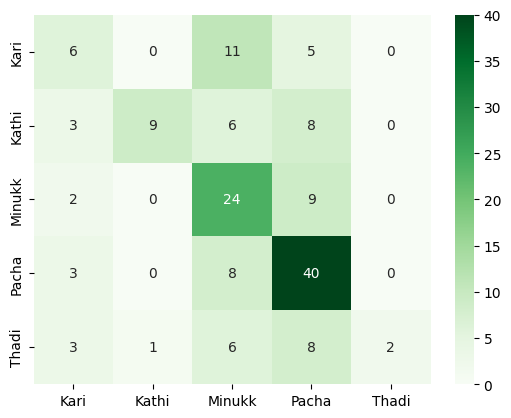

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

#np.argmax(y_test.values, axis=1)
print(classification_report(y_test_one_hot,y_pred))

cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(cm,cmap='Greens', annot=True, xticklabels = ["Kari", "Kathi","Minukk","Pacha","Thadi"],yticklabels = ["Kari", "Kathi","Minukk","Pacha","Thadi"])


In [ ]:
print(shape(x_test_resized))


tf.Tensor([154  32  32   3], shape=(4,), dtype=int32)


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a classifier
X_train = x_train_resized
#print(X_test)
X_test = x_test_resized
clf = RandomForestClassifier()
ovr = OneVsRestClassifier(clf)
print(y_train_one_hot)
ovr.fit(X_train, y_train_one_hot)


# Predict the class probabilities for the test data
y_scores = ovr.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
y_test1 = np.argmax(y_test_one_hot, axis=1)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_scores.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test1 == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_scores.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_scores.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_scores.shape[1]
macro_auc = auc(all_fpr, mean_tpr)

class_labels = ["Kathi", "Kari", "Pacha", "Minuk", "Thadi"]

# Plot the ROC curve for each class and the macro-average ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')

for i in range(y_scores.shape[1]):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_labels[i], roc_auc[i]))
plt.plot(all_fpr, mean_tpr, label='Macro-average (AUC = {:.2f})'.format(macro_auc), lw=2, color='navy')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


ValueError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.python.ops.array_ops import shape
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Train a classifier
#X_train = x_train_resized.reshape(x_train_resized.shape[0], -1)
#X_test = x_test_resized.reshape(x_test_resized.shape[0], -1)
X_train = x_train_resized
X_test = x_test_resized
clf = RandomForestClassifier()
ovr = OneVsRestClassifier(clf)
ovr.fit(X_train, y_train_one_hot)




# Predict the class probabilities for the test data
y_scores = ovr.predict_proba(X_test)

print(y_scores)
#print(y_test.values)

# Compute the ROC curve and AUC score for each class

# roc curve for classes

thresh ={}

n_class = 5
y_test1= np.argmax(y_test_one_hot, axis=1)
print(y_test1)
# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(y_scores.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test1 == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_scores.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_scores.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_scores.shape[1]
macro_auc = auc(all_fpr, mean_tpr)

class_labels = ["Kathi", "Kari", "Pacha", "Minuk", "Thadi"]

# Plot the ROC curve for each class and the macro-average ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')


for i in range(y_scores.shape[1]):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_labels[i], roc_auc[i]))
plt.plot(all_fpr, mean_tpr, label='Macro-average (AUC = {:.2f})'.format(macro_auc), lw=2, color='navy')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()